**Each datafile was moved left or right about 61 cm (24 inches)**

In [18]:
%matplotlib notebook

import scipy
import pandas as pd
import numpy as np
import glob
import json
from pprint import pprint
from collections import OrderedDict
from math import sin, cos, radians

from IPython.core.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
path = "./data/"
files = glob.glob(f"{path}*.json")
files = sorted(files)
files

['./data/data_2019-05-16-001527.json',
 './data/data_2019-05-16-001536.json',
 './data/data_2019-05-16-001544.json',
 './data/data_2019-05-16-001552.json',
 './data/data_2019-05-16-001604.json']

In [49]:
raw = []
datafile = files[1]
with open(datafile, "r") as f:
    for row in f:
        item = json.loads(row)
        raw.append(item)

print("{} samples".format(len(raw)))
pprint(raw[0])

249 samples
{'distance': {'cm': 1496.23, 'inches': 589.07},
 'euler_angles': {'heading': 258.5625, 'pitch': 0.25, 'roll': -1.4375},
 'imu_calibration': {'accelerometer': 3,
                     'gyroscope': 3,
                     'magnetometer': 3,
                     'system': 2},
 'linear_acceleration': {'x': 0.06, 'y': -0.02, 'z': -0.28},
 'quaternion': {'w': 0.63311767578125,
                'x': -0.011474609375,
                'y': 0.00616455078125,
                'z': 0.77392578125},
 'time': {'scale': 'microsecond', 'start': 1557980136635747}}


In [50]:
def transform(instance):
    obj = {
        "microseconds": instance["time"]["start"],
    }
    obj.update(instance["linear_acceleration"])
    return obj

data = [transform(ii) for ii in raw]
df = pd.DataFrame(data).sort_values(by=['microseconds'])
df["time"] = pd.to_datetime(df["microseconds"], unit='us')

# Plot Acceleration Curves

<IPython.core.display.Javascript object>


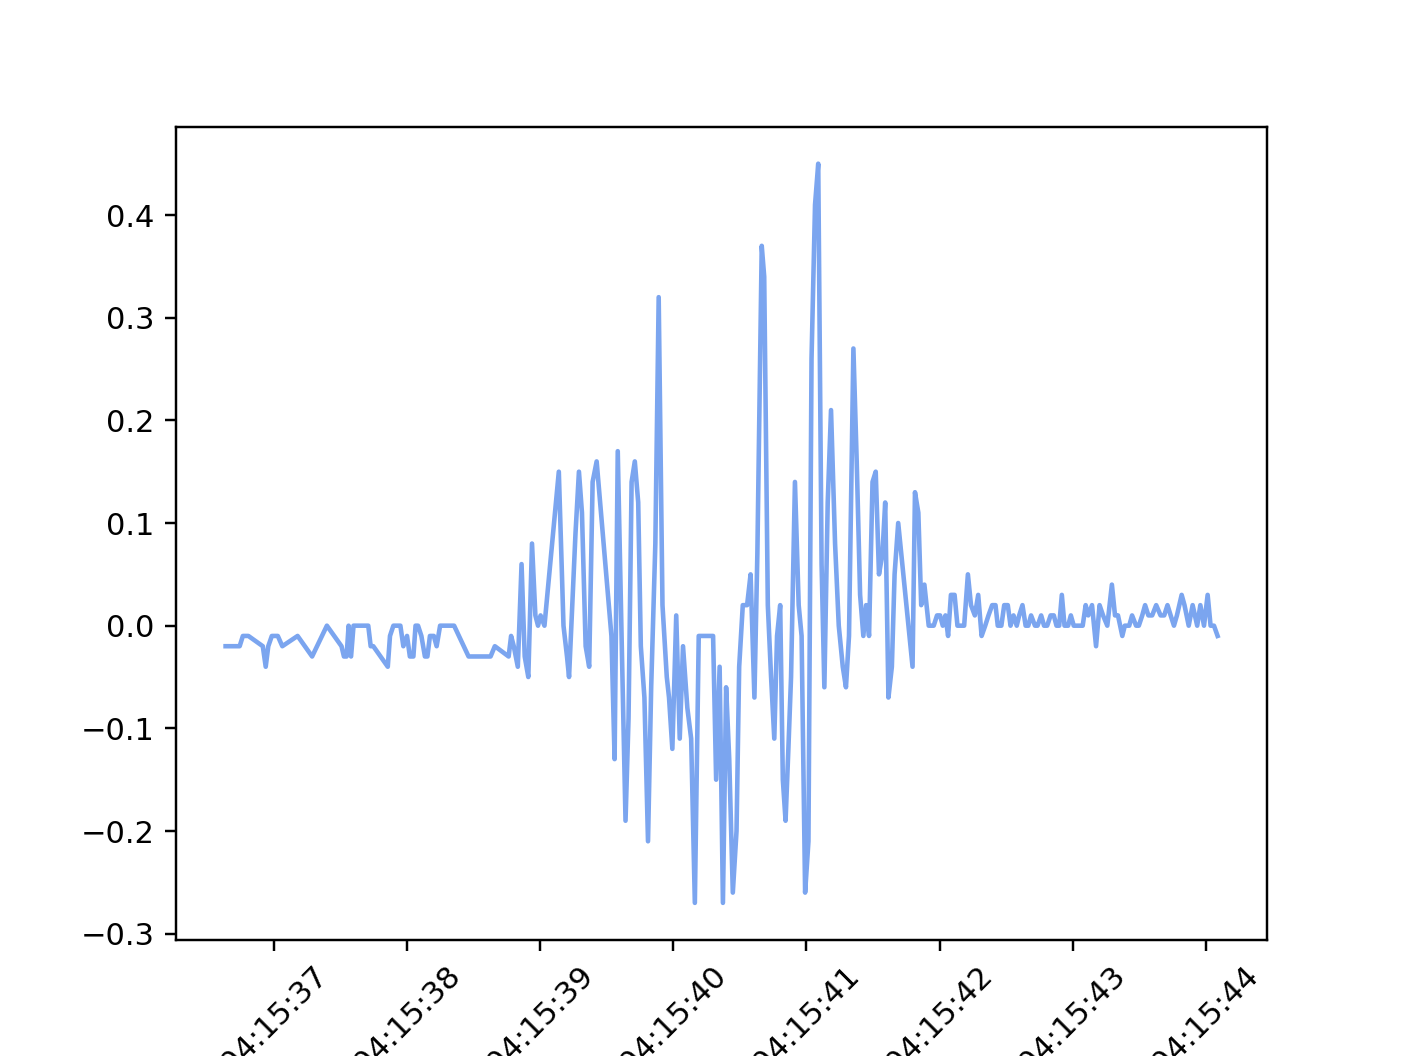

In [51]:
fig, ax = plt.subplots()
# ax.plot(df["time"], df["x"], label="x axis", color="crimson", alpha=.85)
ax.plot(df["time"], df["y"], label="x axis", color="cornflowerblue", alpha=.85)
# ax.plot(df["time"], df["z"], label="x axis", color="forestgreen", alpha=.85)
plt.xticks(rotation=45)
plt.show()

# ?

In [52]:
data[:5]

[{'microseconds': 1557980136635747, 'x': 0.06, 'y': -0.02, 'z': -0.28},
 {'microseconds': 1557980136741399, 'x': 0.08, 'y': -0.02, 'z': -0.27},
 {'microseconds': 1557980136765535, 'x': 0.08, 'y': -0.01, 'z': -0.27},
 {'microseconds': 1557980136792000, 'x': 0.06, 'y': -0.01, 'z': -0.29},
 {'microseconds': 1557980136806890, 'x': 0.07, 'y': -0.01, 'z': -0.28}]

In [53]:
from sklearn.preprocessing import normalize

df["x"] = (df["x"] - df["x"].mean()) / (df["x"].max() - df["x"].min())

<IPython.core.display.Javascript object>


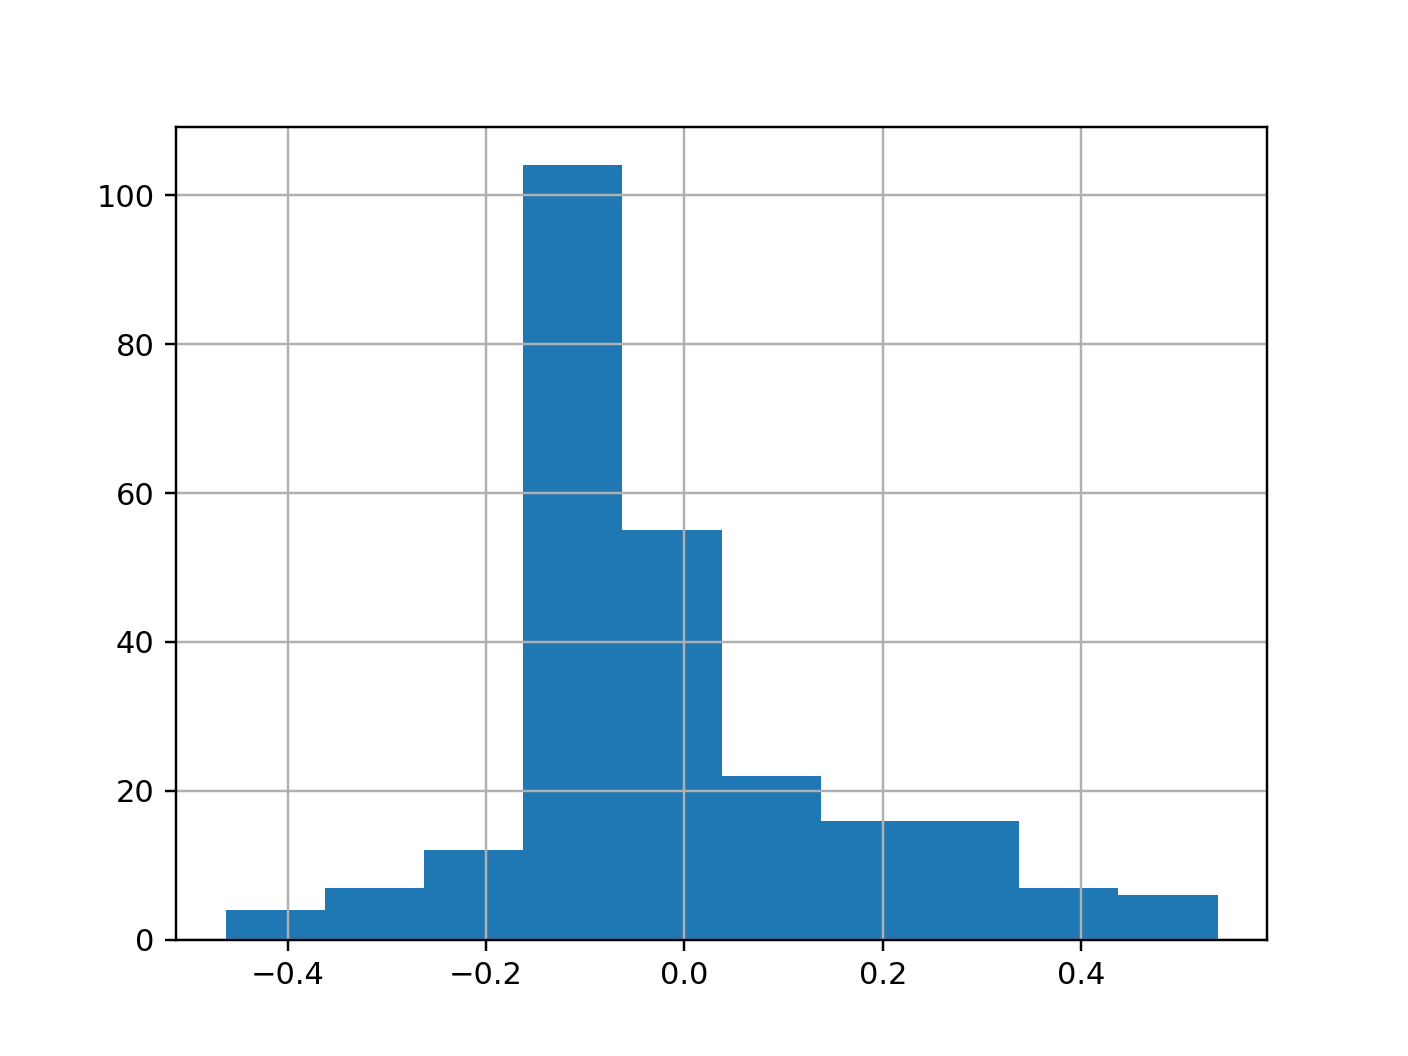

In [54]:
fig, ax = plt.subplots()
df["x"].hist(ax=ax)

<IPython.core.display.Javascript object>


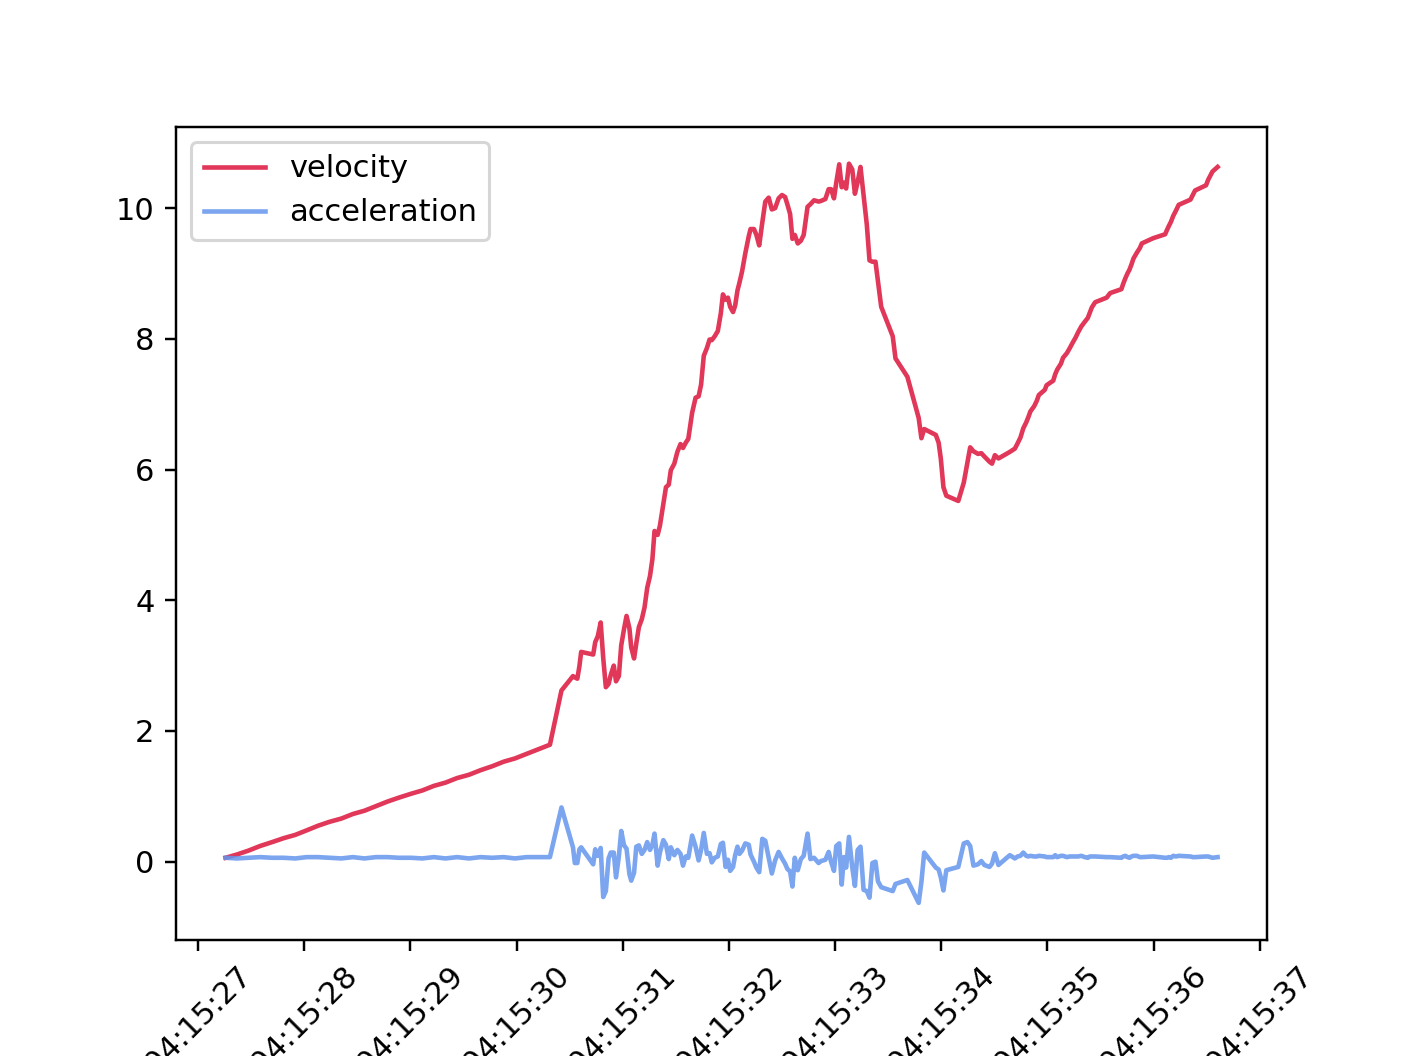

In [47]:
velocity = [0]
acceleration = [ii["x"] for ii in data]

for idx, a in enumerate(acceleration):
    velocity.append(velocity[idx] + a)

    
fig, ax = plt.subplots()
ax.plot(df["time"], velocity[1:], label="velocity", color="crimson", alpha=.85)
ax.plot(df["time"], acceleration, label="acceleration", color="cornflowerblue", alpha=.85)
# ax.plot(df["time"], df["z"], label="x axis", color="forestgreen", alpha=.85)
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [56]:
df[df["time"] > '2019-05-16 04:15:35'].head()

,microseconds,x,y,z,time
0,1557980136635747,0.008032,-0.02,-0.28,2019-05-16 04:15:36.635747
1,1557980136741399,0.024839,-0.02,-0.27,2019-05-16 04:15:36.741399
2,1557980136765535,0.024839,-0.01,-0.27,2019-05-16 04:15:36.765535
3,1557980136792000,0.008032,-0.01,-0.29,2019-05-16 04:15:36.792000
4,1557980136806890,0.016435,-0.01,-0.28,2019-05-16 04:15:36.806890


In [67]:
# "{:1.18f}".format(df["x"].mean())
df["x"].mean()

7.133963210442772e-18

In [58]:
df["x"].sum()

1.7763568394002505e-15